
# Title - Solar Bright Region Detection using SunPy and ndimage
How you can to find the brightest regions in an AIA image and
count the approximate number of regions of interest using ndimage.


# Problem Statement 
Solar astronomers often need to identify and study bright regions on the Sun's surface, such as active regions, solar flares, and prominences. In this project, you will develop a Python program using SunPy and the ndimage module from SciPy to detect and analyze bright regions in solar images obtained from the Atmospheric Imaging Assembly (AIA) instrument on the Solar Dynamics Observatory (SDO) satellite.

In [1]:
pip install sunpy

  Obtaining dependency information for sunpy from https://files.pythonhosted.org/packages/67/d2/75775dec926a6f055bee4feeb04e4a453b9907390cf0ffa9a847a6cd63f6/sunpy-5.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for astropy!=5.1.0,>=5.0.6 from https://files.pythonhosted.org/packages/11/7a/499e56995e7b477effd1807231be914852cc9a2f9f42975d0affa3cf09ca/astropy-5.3.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
    --------------------------------------- 0.0/3.2 MB 991.0 kB/s eta 0:00:04
   - -------------------------------------- 0.1/3.2 MB 1.2 MB/s eta 0:00:03
   - -------------------------------------- 0.1/3.2 MB 1.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.2/3.2 MB 1.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.2/3.2 MB 1.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.2/3.2 MB 1.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.3/3.2 MB 

In [2]:
pip install ipywidgets

In [3]:
pip install --upgrade astropy sunpy


Note: you may need to restart the kernel to use updated packages.


In [22]:
import matplotlib.pyplot as plt
from scipy import ndimage

import sunpy.map
from sunpy.data.sample import AIA_193_IMAGE
#AIA_193_IMAGE #AIA_171_IMAGE # 

We start with the sample data.



In [23]:
aiamap_mask = sunpy.map.Map(AIA_193_IMAGE)
aiamap = sunpy.map.Map(AIA_193_IMAGE)

First we make a mask, which tells us which regions are bright. We
choose the criterion that the data should be at least 10% of the maximum
value. Pixels with intensity values greater than this are included in the
mask, while all other pixels are excluded.



In [24]:
mask = aiamap.data < aiamap.max() * 0.10

In [25]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Mask is a `bool` array. It can be used to modify the original map object
without modifying the data. Once this mask attribute is set, we can plot the
image again.



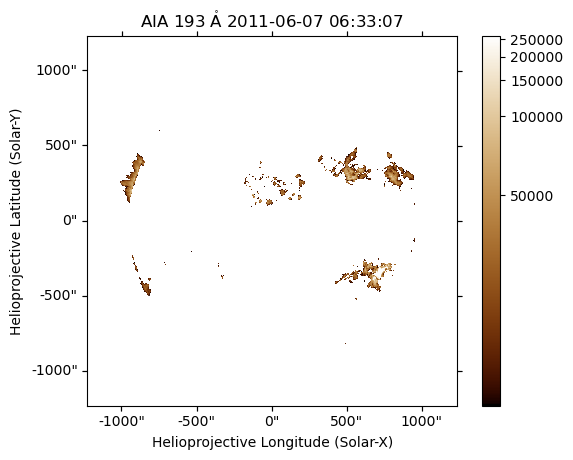

In [26]:
aiamap_mask.mask = mask

fig = plt.figure()
ax = fig.add_subplot(projection=aiamap_mask)
aiamap_mask.plot(axes=ax)
plt.colorbar()

plt.show()

Only the brightest pixels remain in the image.
However, these areas are artificially broken up into small regions.
We can solve this by applying some smoothing to the image data.
Here we apply a 2D Gaussian smoothing function to the data.



In [27]:
data2 = ndimage.gaussian_filter(aiamap.data * ~mask, 14)

The issue with the filtering is that it create pixels where the values are
small (<100), so when we go on later to label this array,
we get one large region which encompasses the entire array.
If you want to see, just remove this line.



In [28]:
data2[data2 < 100] = 0

Now we will make a second sunpy map with this smoothed data.



In [29]:
aiamap2 = sunpy.map.Map(data2, aiamap.meta)

The function `scipy.ndimage.label` counts the number of contiguous regions
in an image.



In [30]:
labels, n = ndimage.label(aiamap2.data)

Finally, we plot the smoothed bright image data, along with the estimate of
the number of distinct regions. We can see that approximately 6 distinct hot
regions are present above the 10% of the maximum level.



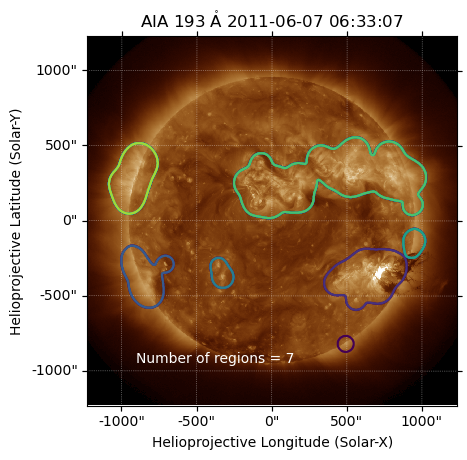

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax)
ax.contour(labels)
plt.figtext(0.3, 0.2, f'Number of regions = {n}', color='white')

plt.show()

# Conclusion :
the use of SunPy and ndimage for solar bright region detection offers a powerful and efficient approach to studying and monitoring solar activity. By leveraging these tools, astronomers and solar physicists can identify and analyze solar bright regions, such as sunspots and active regions, with high precision. This process aids in understanding solar dynamics, tracking solar features, and forecasting space weather events, contributing to our knowledge of the Sun's influence on our solar system and technological infrastructure on Earth.

Sunpy image data reference link - https://sdo.gsfc.nasa.gov/data/
